<a href="https://colab.research.google.com/github/alitarraf/Data-Science-Training/blob/master/Graduate_Admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduate Admissions
In this workshop, we will try to predict the chance of admissions (ranging from 0 to 1) for students during their application for a Masters program. Prediction is based on several parameters, including:
  - GRE Scores ( out of 340 )
  - TOEFL Scores ( out of 120 )
  - University Rating ( out of 5 )
  - Statement of Purpose ( out of 5 )
  - Letter of Recommendation Strength ( out of 5 )
  - Undergraduate GPA ( out of 10 )
  - Research Experience ( either 'yes' or 'no' )

# 1. Import necessary python modules (libraries)
We will need the following libraries:
* [Numpy](http://www.numpy.org/) — for scientific computing (e.g., linear algebra (vectors & matrices)).
* [Pandas](https://pandas.pydata.org/) — providing high-performance, easy-to-use data reading, manipulation, and analysis.
* [Matplotlib](https://matplotlib.org/) & [seaborn](https://seaborn.pydata.org/) — plotting & visualization.
* [scikit-learn](https://scikit-learn.org/stable/) — a tool for data mining and machine learning models.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot

## 2. Download the data
Dataset can be found on Kaggle. For simplicity, it has been uploaded to Github. Link is provided for you in the cell below. Let's download our data from Github.

In [2]:
!git clone https://github.com/alitarraf/Data-Science-Training.git  # download data from Github
# change directory into the downloaded folder
%cd "Data-Science-Training/data"
!ls -lah  # list files in current directory

fatal: destination path 'Data-Science-Training' already exists and is not an empty directory.
/content/Data-Science-Training/data
total 12M
drwxr-xr-x 3 root root  4.0K Jun 20 14:15  .
drwxr-xr-x 5 root root  4.0K Jun 20 14:15  ..
-rw-r--r-- 1 root root   18K Jun 20 14:15  Admission_Predict_Ver1.2.csv
-rw-r--r-- 1 root root  8.8M Jun 20 14:15  Barcelona_Listing_2019.csv
-rw-r--r-- 1 root root   31K Jun 20 14:15 'diet - medium.xls'
-rw-r--r-- 1 root root  302K Jun 20 14:15  IMDB-Movie-Data.csv
-rw-r--r-- 1 root root 1004K Jun 20 14:15  Lebanese_Governorates.json
-rw-r--r-- 1 root root   640 Jun 20 14:15  LebanonPopulation.csv
drwxr-xr-x 2 root root  4.0K Jun 20 14:15 'Lebanon Shapefile'
-rw-r--r-- 1 root root    55 Jun 20 14:15  purchases.csv
-rw-r--r-- 1 root root  9.7K Jun 20 14:15  purchases.xlsx
-rw-r--r-- 1 root root   57K Jun 20 14:15  stockPrices.csv
-rw-r--r-- 1 root root  948K Jun 20 14:15  WA_Fn-UseC_-Telco-Customer-Churn.csv


# 3. Read & visualize data
Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use pandas module, more specifically, the read_csv function.

**Task 1:** read dataset into the variable **data** using **read_csv** function.

In [3]:
dataset_path = 'Admission_Predict_Ver1.2.csv'
data = pd.read_csv(dataset_path)  # read dataset from disk
data.head()  # print first 5 rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


## 4. Exploratory Data Analysis
Let's dig deeper & understand out data

**Task 2:** how many rows & columns in our dataset

In [4]:
n_rows = data.shape[0]
n_columns = data.shape[1]
print('There are {} rows and {} columns.'.format(n_rows,n_columns))

There are 500 rows and 9 columns.


using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  498 non-null float64
CGPA                 500 non-null float64
Research             500 non-null object
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 35.2+ KB


### Some statistics
using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each feature (column)

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,498.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.487952,8.576440,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.923021,0.604813,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.97000


### Data Visualization

### GRE Score:
**Task 3:** plot a histogram shows the frequency for GRE scores.

A link to the pandas plotting documentation can be found [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

Use the documentation to plot histograms, and scatter plots below.

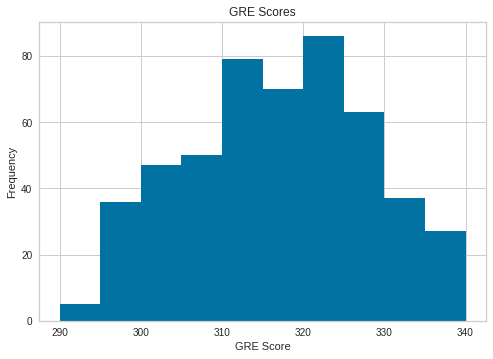

In [7]:
data["GRE Score"].plot('hist')
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

There is a density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.

### CGPA Scores VS University Ratings:
**Task 4:** what is the relation between the rating of the university and CGPA? Let's plot a **scatter** plot to find out.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


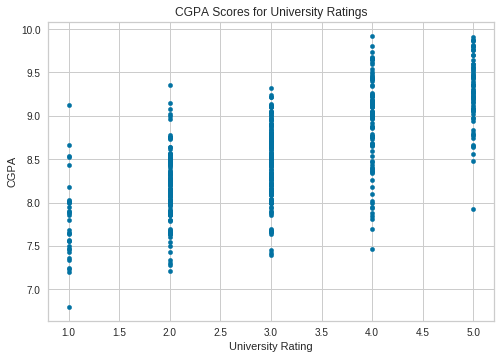

In [8]:
data.plot(x='University Rating',y='CGPA',kind='scatter')
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

**Conclusion >>** As the quality of the university increases, the CGPA score increases.

### Correlation between GRE VS CGPA Scores:
**Task 5:** Let's plot a **scatter** plot to find out how GRE and CGPA Scores are correlated.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


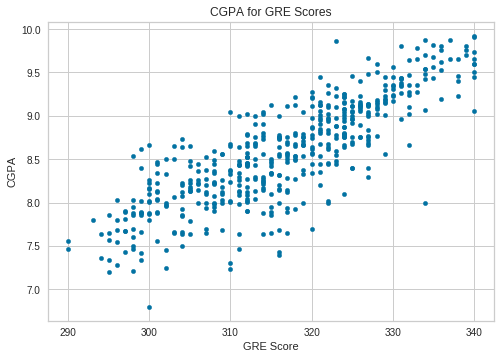

In [9]:
data.plot(x='GRE Score',y='CGPA',kind='scatter')
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

**Conclusion >>** Candidates with high GRE scores usually have a high CGPA score.

### Does University Rating increase chance of admit?

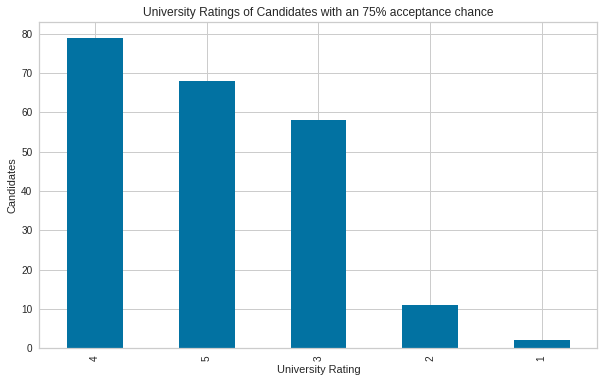

In [10]:
condition = data["Chance of Admit"] >= 0.75
s = data[condition]["University Rating"].value_counts()
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(10, 6))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

**Conclusion >>** Candidates who graduate from good universities are more fortunate to be accepted.

### Correlation between CGPA, GRE, and SOP

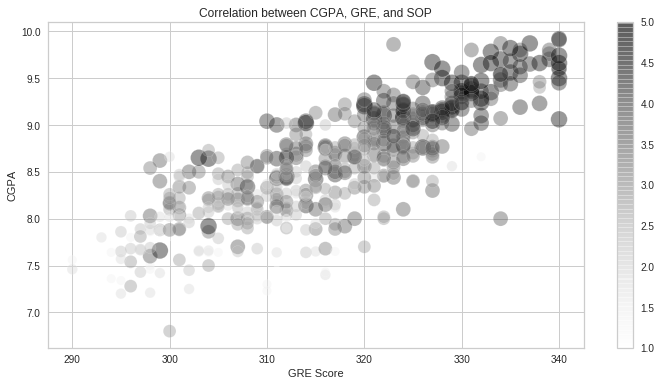

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(x = data['GRE Score'],
            y = data['CGPA'],
            s = data['SOP']*55,
            c = data['SOP'],
            alpha=0.4,
            edgecolors='w')

plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Correlation between CGPA, GRE, and SOP')
plt.colorbar()
plt.show()

**Conclusion >>** Candidates with high GRE and CGPA scores write better Statement of Purpose!

### Correlation between all columns
**Task 6:** Let's find out which parameters affect addmissions the most by finding correlations.

Look at documentation of corr() function in pandas [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

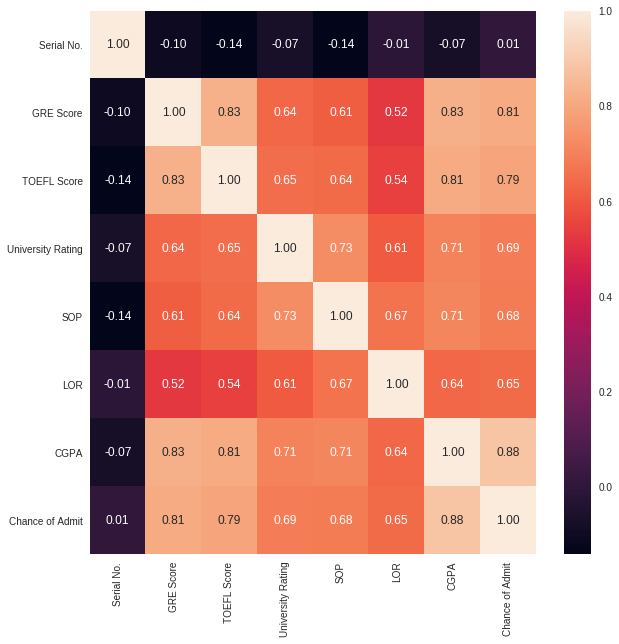

In [12]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax) 
# annot=True prints correlation values inside the heatmap, fmt='.2f' prints only two decimal numbers
plt.show()

The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE

The 3 least important features for admission to the Master: Research, LOR, and SOP

## 5. Preprocessing
"Garbage in, garbage out". Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)

**Task 7:** drop rows with missing values

DropNA documentation [is here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)



In [13]:
# print how many missing value in each column (feature)
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  2
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
# drop rows with missing values
# Look at documentation of DropNA
data = data.dropna()
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           498 non-null int64
GRE Score            498 non-null int64
TOEFL Score          498 non-null int64
University Rating    498 non-null int64
SOP                  498 non-null float64
LOR                  498 non-null float64
CGPA                 498 non-null float64
Research             498 non-null object
Chance of Admit      498 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.9+ KB


**Task 8:** convert Research column to numerical values: 1 if yes, 0 if no

Check the documentation to convert to categorical data from codes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.from_codes.html#pandas.Categorical.from_codes)



In [16]:
research = ['no', 'yes']
data['Research'] = data['Research'].astype('category',categories= research).cat.codes
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Task 9:** normalize by dividing by maximum

In [17]:
# get the max of each column
df_max = data.max()
df_max

Serial No.           500.00
GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.92
Research               1.00
Chance of Admit        0.97
dtype: float64

In [18]:
# divide each column by its maximum value
data = data/df_max
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.502695,0.930930,0.893290,0.624096,0.674699,0.697590,0.864956,0.562249,0.744980
std,0.288299,0.033223,0.050777,0.228153,0.198491,0.184604,0.060767,0.496609,0.145066
min,0.002000,0.852941,0.766667,0.200000,0.200000,0.200000,0.685484,0.000000,0.350515
25%,0.254500,0.905882,0.858333,0.400000,0.500000,0.600000,0.819556,0.000000,0.652062
50%,0.503000,0.932353,0.891667,0.600000,0.700000,0.700000,0.862903,1.000000,0.742268
75%,0.751500,0.955882,0.933333,0.800000,0.800000,0.800000,0.911290,1.000000,0.845361
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Task 10:** split data into training (80%) & testing (20%)

Look at documentation of sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


![alt text](https://raw.githubusercontent.com/alitarraf/Data-Science-Training/master/assets/machine-learning-splitting-datasets-3-638.jpg)

In [19]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:-1].values  # store all columns (except first & last one) as inputs in X
y = data.iloc[:,-1].values  # store the last column as the output (label) in y
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(398, 7) (398,)
(100, 7) (100,)


## 5. Training & Evaluation
We will be using Multiple linear regression model to predict the chance of admissions.
For evaluation, we will use R^2:
 - the higher R^2, the better.
 - the best R^2 is 1
 - R^2 can be negative.
 
 ![alt text](https://raw.githubusercontent.com/alitarraf/Data-Science-Training/master/assets/0_GJiSgHouP-v0M8A6.png)

### Train on training data only
**Task 11:** train the model using the training data

Check the linear regression documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()  # define our regression model
model.fit(x_train,y_train)  # train our model
print('Model trained!')

r2_train = r2_score(y_train, model.predict(x_train))
print('R^2 on training data is', r2_train)

Model trained!
R^2 on training data is 0.815666174032786


#### Evaluate model performace on unseen (test) data

In [21]:
r2_test = r2_score(y_test, model.predict(x_test))
print('R^2 on test data is', r2_test)

R^2 on test data is 0.8415161366270939


R^2 for traing is close from R^2 for test (unseen) data >> model is generalizing & performing well :)

### Another more interesting way to look at the error is to visualize the residuals plot 
A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

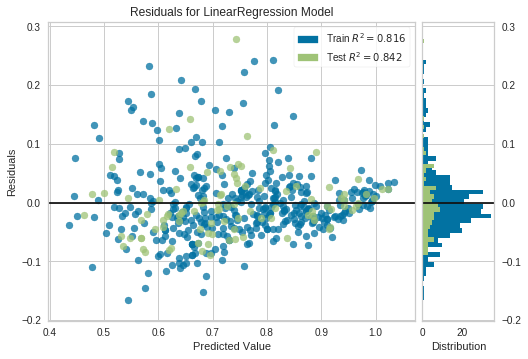

In [22]:
#Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

#### Features importance (weights)

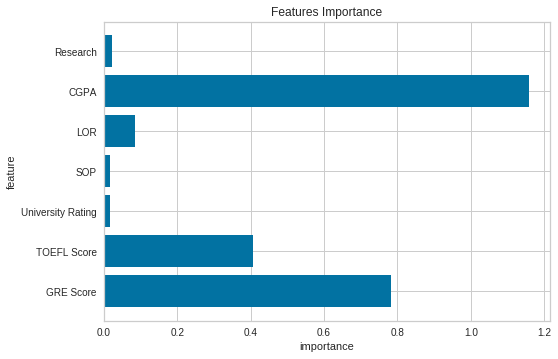

In [23]:
columns_names = data.columns[1:-1].values
features_importance = model.coef_
plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

This is consistent with our previous conclusion which states that the 3 most important features for admission to the Master are **CGPA**, **GRE SCORE**, and **TOEFL SCORE**.

# References
1. https://github.com/BeirutAI/Intro2DS
2. https://hackernoon.com/an-intuitive-perspective-to-linear-regression-7dc566b2c14c
3. https://www.scikit-yb.org/en/latest/api/regressor/residuals.html